# Comparing Abstractive, Extractive and Hybrid Summarization Methods with ROUGE, SMART, and SummaC

In [42]:
from tqdm import tqdm
from functools import reduce 

tqdm.pandas(desc='bar')

# Validate everything is working on this environment

So far, the best kernel I've found is 'Python 3.8 Recommenders' from the preconference workshop.
SummaC needs Python 3.8 to work.

Make sure to pip install: 
    - rouge
    - summac
To install packages, use this command:

import sys

!{sys.executable} -m pip install <package_name>

You also need to import smart_eval (present in this repository), if you have issues with this import try this:


import sys 

sys.path.append('hybrid_summarization/') # replace the path with the location of smart_eval 

sys.path


The next few cells have examples for each metric, run through them to see a sample output for each metric and ensure everything is properly installed.

## SMART Score

In [24]:
from smart_eval import matching_functions as mf
from smart_eval import summeval_utils as utils
from smart_eval import scorer

In [25]:
reference='This article is about this guy named Joe who got arrested.'
candidate='This article is about a guy named Joe'

matcher = mf.chrf_matcher
smart_scorer = scorer.SmartScorer(matching_fn=matcher)
score = smart_scorer.smart_score(reference, candidate)
score

{'smart1': {'recall': 57.804793788108014,
  'precision': 57.804793788108014,
  'fmeasure': 57.804793788108014},
 'smart2': {'recall': 28.902396894054007,
  'precision': 28.902396894054007,
  'fmeasure': 28.902396894054007},
 'smartL': {'recall': 57.804793788108014,
  'precision': 57.804793788108014,
  'fmeasure': 57.804793788108014}}

In [26]:
# Validation test from within smart_eval. No output expected.
from smart_eval.scorer_test import ScorerTest
test = ScorerTest()
test.test_smart_score_precomputation()

## ROUGE Score

In [27]:
from rouge import Rouge

hypothesis = "the #### transcript is a written version of each day 's cnn student news program use this transcript to he    lp students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of storie s you     saw on cnn student news"

reference = "this page includes the show transcript use the transcript to help students with reading comprehension and     vocabulary at the bottom of the page , comment for a chance to be mentioned on cnn student news . you must be a teac    her or a student age # # or older to request a mention on the cnn student news roll call . the weekly newsquiz tests     students ' knowledge of even ts in the news"

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)
scores

[{'rouge-1': {'r': 0.42857142857142855,
   'p': 0.5833333333333334,
   'f': 0.49411764217577864},
  'rouge-2': {'r': 0.18571428571428572,
   'p': 0.3170731707317073,
   'f': 0.23423422957552154},
  'rouge-l': {'r': 0.3877551020408163,
   'p': 0.5277777777777778,
   'f': 0.44705881864636676}}]

## SummaC

In [28]:
# There may be dependencies that need to be installed, make sure to use this:
# import sys
# !{sys.executable} -m pip install <package_name>

# This package is SLOW, the example here will be ok to run on CPU but when running over your entire set make sure to get a GPU 

from summac.model_summac import SummaCZS, SummaCConv

model_zs = SummaCZS(granularity="sentence", model_name="vitc", device="cpu") # If you have a GPU: switch to: device="cuda"
model_conv = SummaCConv(models=["vitc"], bins='percentile', granularity="sentence", nli_labels="e", device="cpu", start_file="default", agg="mean")

document = """Scientists are studying Mars to learn about the Red Planet and find landing sites for future missions.
One possible site, known as Arcadia Planitia, is covered instrange sinuous features.
The shapes could be signs that the area is actually made of glaciers, which are large masses of slow-moving ice.
Arcadia Planitia is in Mars' northern lowlands."""

summary1 = "There are strange shape patterns on Arcadia Planitia. The shapes could indicate the area might be made of glaciers. This makes Arcadia Planitia ideal for future missions."
score_zs1 = model_zs.score([document], [summary1])
score_conv1 = model_conv.score([document], [summary1])
print("[Summary 1] SummaCZS Score: %.3f; SummacConv score: %.3f" % (score_zs1["scores"][0], score_conv1["scores"][0])) # [Summary 1] SummaCZS Score: 0.582; SummacConv score: 0.536

summary2 = "There are strange shape patterns on Arcadia Planitia. The shapes could indicate the area might be made of glaciers."
score_zs2 = model_zs.score([document], [summary2])
score_conv2 = model_conv.score([document], [summary2])
print("[Summary 2] SummaCZS Score: %.3f; SummacConv score: %.3f" % (score_zs2["scores"][0], score_conv2["scores"][0])) # [Summary 2] SummaCZS Score: 0.877; SummacConv score: 0.709

<All keys matched successfully>


/home/vaburban/miniconda3/envs/recommender/lib/python3.8/site-packages/summac/model_summac.py:267: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  histograms = torch.FloatTensor(histograms).to(self.device)


[Summary 1] SummaCZS Score: 0.582; SummacConv score: 0.536
[Summary 2] SummaCZS Score: 0.877; SummacConv score: 0.709


In [29]:
score_zs1

{'scores': [0.5822293596963087],
 'images': [array([[[2.01887526e-02, 1.95911229e-02, 4.90402468e-02],
          [9.74409878e-01, 3.60302301e-03, 5.41315833e-03],
          [4.27763492e-01, 9.89184499e-01, 3.91403353e-03],
          [2.76024360e-03, 4.81770281e-03, 5.04470104e-03]],
  
         [[5.75739220e-02, 1.52651355e-01, 5.57212681e-02],
          [1.57941575e-03, 2.66085472e-03, 2.53535481e-03],
          [1.58614535e-02, 7.81361246e-04, 1.30786309e-02],
          [5.49613126e-03, 1.31663335e-02, 1.66258886e-02]],
  
         [[9.22237337e-01, 8.27757537e-01, 8.95238459e-01],
          [2.40106843e-02, 9.93736148e-01, 9.92051482e-01],
          [5.56375027e-01, 1.00341653e-02, 9.83007312e-01],
          [9.91743624e-01, 9.82015967e-01, 9.78329360e-01]]])]}

In [30]:
score_conv1

{'scores': [0.5359524488449097]}

# BERT Score

In [1]:
import sys
!{sys.executable} -m pip install bert_score
# !{sys.executable} -m spacy download en_core_web_sm

In [13]:
import torch
import spacy
from bert_score import score
cands = ["28-year-old chef found dead in San Francisco mall",
"A 28-year-old chef who recently moved to San Francisco was found dead in the staircase of a local shopping center.",
"The victims brother said he cannot imagine anyone who would want to harm him, Finally, it went uphill again at him.",
"The corpse, found Wednesday morning in the Westfield Mall, was identified as the 28-year-old Frank Galicia from San Francisco, the Justice Department said in San Francisco.",
"The San Francisco Police Department said the death was classified as murder and the investigation is on the running.",
"The victims brother, Louis Galicia, told the ABS broadcaster KGO in San Francisco that Frank, who formerly worked as a cook in Boston, had his dream job as a cook at the Sons & Daughters restaurant in San Francisco six months ago.",
"A spokesman for the Sons & Daughters said they were shocked and destroyed on the ground over his death.",
"We are a small team that works like a close family and we are going to miss him painfully, said the spokesman.",
"Our thoughts and condolences are in this difficult time at Franks's family and friends.",
"Louis Galicia admitted that Frank initially lived in hostels, but that things for him finally went uphill."]
refs = ['28-Year-Old Chef Found Dead at San Francisco Mall.',
"A 28-year-old chef who had recently moved to San Francisco was found dead in the stairwell of a local mall this week.",
"But the victim's brother says he can't think of anyone who would want to hurt him, saying, Things were finally going well for him.",
"The body found at the Westfield Mall Wednesday morning was identified as 28-year-old San Francisco resident Frank Galicia, the San Francisco Medical Examiners Office said.",
"The San Francisco Police Department said the death was ruled a homicide and an investigation is ongoing.",
"The victims brother, Louis Galicia, told ABC station KGO in San Francisco that Frank, previously a line cook in Boston, had landed his dream job as line chef at San Franciscos Sons & Daughters restaurant six months ago.",
"A spokesperson for Sons & Daughters said they were shocked and devastated by his death.",
"We are a small team that operates like a close knit family and he will be dearly missed",
"Our thoughts and condolences are with Frank's family and friends at this difficult time.",
"Louis Galicia said Frank initially stayed in hostels, but recently, Things were finally going well for him."]

In [14]:
P, R, F1 = score(cands, refs, lang="en", rescale_with_baseline=True)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
F1

tensor([0.8820, 0.8710, 0.4999, 0.7199, 0.8073, 0.7730, 0.7003, 0.7001, 0.6673,
        0.7412])

# Data Assessment

In [18]:
import pandas as pd

summary_data_path = 'datasets/cnn_experiment.parquet'
summary_data = pd.read_parquet(summary_data_path)

summary_col = 'highlights'
document_col = 'article'
id_col = 'id'
summary_cols = ['occams_summ_f', 'occams_gpt_summ', 'gpt_gpt_summ', 'gpt_a_summ']

summary_data.head()

,article,highlights,id,gpt_e_summ,occams_summ_f,occams_summ_h,occams_gpt_summ_full,gpt_gpt_summ_full,occams_gpt_summ,gpt_gpt_summ,gpt_a_summ_full,gpt_a_summ
1881,"NEW YORK (CNN) -- Nonnie Dotson, a nurse in th...",Nonnie Dotson was visiting brother in suburb o...,9880666126c7836dbe99b0b42becfee3dcab88cf,"Nonnie Dotson, a nurse in the U.S. Air Force, ...","NEW YORK (CNN) -- Nonnie Dotson, a nurse in th...","NEW YORK (CNN) -- Nonnie Dotson, a nurse in th...","Nonnie Dotson, a nurse in the U.S. Air Force, ...","Nonnie Dotson, a nurse in the U.S. Air Force, ...",Nurse Nonnie Dotson disappeared amid a child s...,Nurse Nonnie Dotson disappeared during a child...,"{\n ""timestamp"": ""2023-06-30T09:15:00"",\n ""t...",The Battle of Zentaria Strait accelerated Oper...
1332,(CNN) -- With a week to go before Election Day...,Obama leads by 8 points in most recent CNN nat...,c24025591e20b5d21062d1a1ec8fbf4686b963b7,The most recent national CNN poll of polls sho...,"In Florida, a CNN/USA Today/Gallup poll conduc...",(CNN) -- With a week to go before Election Day...,Recent national polls show Democratic presiden...,The most recent national CNN poll of polls sho...,Recent national polls show Obama leading McCai...,The most recent national CNN poll of polls sho...,Recent national polls show Democratic presiden...,"Recent polls show Obama leading McCain, but hi..."
444,"BAGHDAD, Iraq (CNN) -- Four U.S. soldiers die...","NEW: As Iraq war enters sixth year, American d...",d80e6a3be826df05df00a87f49cc426fd597f085,Four U.S. soldiers died in a roadside bombing ...,"BAGHDAD, Iraq (CNN) -- Four U.S. soldiers died...","BAGHDAD, Iraq (CNN) -- Four U.S. soldiers died...",Four U.S. soldiers were killed in a roadside b...,Four U.S. soldiers were killed in a roadside b...,4 US soldiers and 8 Pentagon contractors were ...,"Four U.S. soldiers died, reaching 4,000 Americ...",Four U.S. soldiers were killed in a roadside b...,"4 US soldiers die in Iraq bombing, marking 4,0..."
86,"ALGIERS, Algeria (CNN) -- Rescuers are sifting...",Two bombs explode in Algerian capital near gov...,4cf51ce9372dff8ff7f44f098eab1c1d7569af7a,Rescuers are sifting through the rubble of the...,"ALGIERS, Algeria (CNN) -- Rescuers are sifting...","ALGIERS, Algeria (CNN) -- Rescuers are sifting...",A powerful bomb destroyed the United Nations h...,A bomb attack has caused significant damage to...,A powerful bomb by al Qaeda destroyed the UN h...,"Bomb attack on UN headquarters in Algiers, kil...",A powerful bomb ripped off the facade of the U...,Al Qaeda-linked group destroys U.N. HQ in Algi...
958,(CNN) -- The crib in Ellen Darcy's Boston home...,"Guatemala and Vietnam say corruption, baby-ste...",7551503e7e57bd519913b0df90ca1e80d5305b05,Guatemala has announced it will conduct a case...,(CNN) -- The crib in Ellen Darcy's Boston home...,(CNN) -- The crib in Ellen Darcy's Boston home...,Guatemala is conducting a review of all pendin...,Guatemala is conducting a review of all pendin...,"Guatemala reviews pending foreign adoptions, m...",Guatemala is conducting a review of all pendin...,The countries of Guatemala and Vietnam have re...,Guatemala and Vietnam suspend international ad...


## ROUGE Score

In [23]:
summary_cols = ['occams_summ_f', 'occams_gpt_summ', 'gpt_gpt_summ', 'gpt_a_summ']


def rouge_score(row):
    all_rouge_scores = []
    for col in summary_cols:
        scores = rouge.get_scores(row[summary_col], row[col])[0]
        for score in scores.keys():
            scores[score] = scores[score]['f']
        scores['summary_type'] = col
        all_rouge_scores.append(scores)
    return all_rouge_scores

summary_data['rouge_scores'] = summary_data.apply(rouge_score, axis=1)

NameError: name 'rouge' is not defined

In [42]:
len(summary_data)

247

In [43]:
rouge_score_df = summary_data[[id_col, 'rouge_scores']].explode('rouge_scores')
rouge_score_df = pd.concat([rouge_score_df.drop(['rouge_scores'], axis=1), rouge_score_df['rouge_scores'].apply(pd.Series)], axis=1)
rouge_score_df

,id,rouge-1,rouge-2,rouge-l,summary_type
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.263158,0.024390,0.210526,occams_summ_f
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.121212,0.028571,0.121212,occams_gpt_summ
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.162162,0.026316,0.162162,gpt_gpt_summ
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.032258,0.000000,0.032258,gpt_a_summ
1332,c24025591e20b5d21062d1a1ec8fbf4686b963b7,0.235294,0.025641,0.176471,occams_summ_f
...,...,...,...,...,...
420,e1afe080ecf3565b0103214c21f49e8b03741024,0.315789,0.065574,0.280702,gpt_a_summ
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.281250,0.028986,0.250000,occams_summ_f
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.206897,0.063492,0.206897,occams_gpt_summ
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.150943,0.071429,0.150943,gpt_gpt_summ


In [44]:
rouge_score_df.groupby(by=['summary_type'])[['rouge-1', 'rouge-2', 'rouge-l']].mean().T

summary_type,gpt_a_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_f
rouge-1,0.225558,0.230669,0.220528,0.258427
rouge-2,0.048017,0.054769,0.046320,0.080569
rouge-l,0.210986,0.211036,0.203352,0.233842


## SMART Score

In [46]:
# Calculating SMART Scores

matcher = mf.chrf_matcher
smart_scorer = scorer.SmartScorer(matching_fn=matcher)

from collections import OrderedDict
 

def smart_score(row):
    all_smart_scores = []
    for col in summary_cols:
        scores = smart_scorer.smart_score(row[summary_col], row[col])
        for score in scores.keys():
            scores[score] = scores[score]['fmeasure']
        scores['summary_type'] = col
        all_smart_scores.append(scores)
    return all_smart_scores

summary_data['smart_scores'] = summary_data.apply(smart_score, axis=1)

In [47]:
smart_score_df = summary_data[[id_col, 'smart_scores']].explode('smart_scores')
smart_score_df = pd.concat([smart_score_df.drop(['smart_scores'], axis=1), smart_score_df['smart_scores'].apply(pd.Series)], axis=1)


In [48]:
smart_score_df.groupby(by=['summary_type'])[['smart1', 'smart2', 'smartL']].mean().T

summary_type,gpt_a_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_f
smart1,28.026394,28.733920,27.503279,29.824661
smart2,18.975674,19.223180,18.492366,19.186212
smartL,27.453882,28.116414,27.009379,29.309766


## SummaC

In [26]:
from summac.model_summac import SummaCZS, SummaCConv

model_zs = SummaCZS(granularity="sentence", model_name="vitc", device="cuda", max_doc_sents=500) # If you have a GPU: switch to: device="cuda"
model_zs_nocon = SummaCZS(granularity="sentence", model_name="vitc", device="cuda", max_doc_sents=500, use_con=False) # If you have a GPU: switch to: device="cuda"

model_conv = SummaCConv(models=["vitc"], bins='percentile', granularity="sentence", nli_labels="e", device="cuda", start_file="default", agg="mean", max_doc_sents=500)

<All keys matched successfully>


In [36]:
def summac_score(row):
    all_summac_scores = []
    with open('untitled.txt', 'a') as f:
        f.write('hi')
    for col in summary_cols:
        scores = {}
        scores['SummaCZS'] = model_zs.score([row[document_col]], [row[col]])['scores'][0]
        scores['SummaCZS_no_con'] =model_zs_nocon.score([row[document_col]], [row[col]])['scores'][0]
        scores['SummaConv'] = model_conv.score([row[document_col]], [row[col]])['scores'][0]
        scores['summary_type'] = col
        all_summac_scores.append(scores)
    return all_summac_scores

summary_data['summac_scores'] = summary_data.apply(summac_score, axis=1)

In [37]:
summac_score_df = summary_data[[id_col, 'summac_scores']].explode('summac_scores')
summac_score_df = pd.concat([summac_score_df.drop(['summac_scores'], axis=1), summac_score_df['summac_scores'].apply(pd.Series)], axis=1)
summac_score_df

,id,SummaCZS,SummaCZS_no_con,SummaConv,summary_type
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.304443,0.995850,0.938289,occams_summ_f
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,-0.425466,0.338369,0.338597,occams_gpt_summ
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,-0.567891,0.309224,0.283449,gpt_gpt_summ
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,-0.653831,0.020729,0.305042,gpt_a_summ
1332,c24025591e20b5d21062d1a1ec8fbf4686b963b7,0.052734,0.994629,0.982244,occams_summ_f
...,...,...,...,...,...
420,e1afe080ecf3565b0103214c21f49e8b03741024,-0.270500,0.130928,0.221916,gpt_a_summ
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.454590,0.994629,0.882237,occams_summ_f
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,-0.230296,0.347341,0.398169,occams_gpt_summ
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,-0.862564,0.030991,0.212445,gpt_gpt_summ


In [38]:
summac_score_df.groupby(by=['summary_type'])[['SummaCZS', 'SummaCZS_no_con', 'SummaConv']].mean().T

summary_type,gpt_a_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_f
SummaCZS,-0.190346,-0.102510,-0.086492,0.448445
SummaCZS_no_con,0.402955,0.504205,0.490599,0.993038
SummaConv,0.398415,0.450414,0.455483,0.913763


## BERT Score

In [34]:
%%capture --no-display
%%time
def bert_score(row):
    all_bert_scores = []
    for col in summary_cols:
        bert_scores = score([row[col]], [row[document_col]], lang="en", rescale_with_baseline=True)
        bert_scores = [score.item() for score in bert_scores]
        bert_scores_dict = dict(zip(['bert_P', 'bert_R', 'bert_F1'], bert_scores))
        bert_scores_dict['summary_type'] = col
        all_bert_scores.append(bert_scores_dict)
    return all_bert_scores

summary_data['bert_scores'] = summary_data.apply(bert_score, axis=1)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of the model chec

In [35]:
bert_score_df = summary_data[[id_col, 'bert_scores']].explode('bert_scores')
bert_score_df = pd.concat([bert_score_df.drop(['bert_scores'], axis=1), bert_score_df['bert_scores'].apply(pd.Series)], axis=1)
bert_score_df

,id,bert_P,bert_R,bert_F1
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.731615,-0.090454,0.289570
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.302940,-0.227664,0.025056
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.226835,-0.233280,-0.012319
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,-0.101255,-0.411988,-0.259740
1332,c24025591e20b5d21062d1a1ec8fbf4686b963b7,0.567755,-0.061033,0.235539
...,...,...,...,...
420,e1afe080ecf3565b0103214c21f49e8b03741024,0.488593,0.028057,0.249326
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.836612,-0.058065,0.352720
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.391379,-0.252338,0.050350
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.319814,-0.260274,0.014414


In [37]:
bert_score_df.groupby(by=['summary_type'])[['bert_P', 'bert_R', 'bert_F1']].mean().T

id,01307bfd9eda40466465b19b4cabe4dc9e936abf,0130f10c1d700cf42cad5fd24b242667342c86be,016163428c6e9f0eef6a08d243e6f0b286f8796e,04327bc3e426eee01ed61d369fd52415aa300ddc,04b39ee42fdc4284e402fbf7cdc7b825748f38b5,066f8568d9c1c23ca3aeb23330123e7dd8967208,068d37f7a1ee822245dbf9d0d8ddfc281919d7ee,083bc4309f2ea52be2a378e78566d7dcc9f4dd73,085dc5d706487da983655043b144952956cb3c5b,087ac92e2ca469b5ca6277950e63b2f0706d0de2,...,f75073d5b4e22de4dfdbc7d28a3b2e0fec5f34a6,f83e0b40b3e4430ff0f19fbff380e6fcedf879fd,f856ca4cd15992e0e88ae9113bf31b2a5ab55072,f96c780c6db5ca595fb0589ae38ba4e4bc9a29d7,fba9c8bf98b317a788b9501b39afb83629485060,fbc2d5f3f088eda2b8128ebb12a042850f6e4f3d,fc9cc9efab7f6588f46b527b3076241a9bcea672,fd93b423a3805de1c259d527393fd5fb75d06a55,ffb817ce85d7c19720ebbf0b43b01d0da61e9c06,ffb8b9be838da033f6f3383f324d425556723147
bert_P,0.522632,0.391573,0.476996,0.446018,0.538202,0.541020,0.461576,0.594478,0.502175,0.478680,...,0.414523,0.280467,0.530558,0.506311,0.436707,0.295380,0.499940,0.391708,0.415474,0.418404
bert_R,-0.196143,-0.187929,-0.151993,-0.230074,-0.167894,-0.033044,-0.187877,-0.202714,-0.216554,-0.180008,...,-0.267630,-0.216767,-0.147583,-0.206100,-0.207940,-0.197611,-0.163825,-0.222753,-0.175435,-0.157305
bert_F1,0.138434,0.086171,0.144315,0.085892,0.161502,0.239055,0.117324,0.165766,0.118304,0.128803,...,0.050737,0.020801,0.170079,0.125727,0.093966,0.038129,0.147334,0.065568,0.103990,0.115608


## Combining All

In [49]:
all_scores = [smart_score_df, rouge_score_df, summac_score_df]
complete_score_df = reduce(lambda x, y: pd.merge(x, y, on=['id', 'summary_type']), all_scores)
complete_score_df

,id,smart1,smart2,smartL,summary_type,rouge-1,rouge-2,rouge-l,SummaCZS,SummaCZS_no_con,SummaConv
0,9880666126c7836dbe99b0b42becfee3dcab88cf,21.489341,15.101111,21.206439,occams_summ_f,0.263158,0.024390,0.210526,0.304443,0.995850,0.938289
1,9880666126c7836dbe99b0b42becfee3dcab88cf,17.680038,12.810701,17.544049,occams_gpt_summ,0.121212,0.028571,0.121212,-0.425466,0.338369,0.338597
2,9880666126c7836dbe99b0b42becfee3dcab88cf,21.683000,16.049833,21.144599,gpt_gpt_summ,0.162162,0.026316,0.162162,-0.567891,0.309224,0.283449
3,9880666126c7836dbe99b0b42becfee3dcab88cf,15.887730,11.361750,15.503228,gpt_a_summ,0.032258,0.000000,0.032258,-0.653831,0.020729,0.305042
4,c24025591e20b5d21062d1a1ec8fbf4686b963b7,22.943423,15.306749,21.516334,occams_summ_f,0.235294,0.025641,0.176471,0.052734,0.994629,0.982244
...,...,...,...,...,...,...,...,...,...,...,...
983,e1afe080ecf3565b0103214c21f49e8b03741024,39.140797,23.055662,33.959617,gpt_a_summ,0.315789,0.065574,0.280702,-0.270500,0.130928,0.221916
984,72d11f6df74ab4431ce24b8cb391d239e998ec3e,30.841360,16.036429,30.841360,occams_summ_f,0.281250,0.028986,0.250000,0.454590,0.994629,0.882237
985,72d11f6df74ab4431ce24b8cb391d239e998ec3e,24.817510,17.178252,24.817510,occams_gpt_summ,0.206897,0.063492,0.206897,-0.230296,0.347341,0.398169
986,72d11f6df74ab4431ce24b8cb391d239e998ec3e,27.893044,14.268375,27.893044,gpt_gpt_summ,0.150943,0.071429,0.150943,-0.862564,0.030991,0.212445


In [51]:
complete_score_df.to_csv('cnn_scores.csv')

In [50]:
score_cols = list(set(complete_score_df.columns) - set(['id', 'summary_type']))
score_cols.sort()

complete_score_df.groupby(by=['summary_type'])[score_cols].mean().T

summary_type,gpt_a_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_f
SummaCZS,-0.190346,-0.102510,-0.086492,0.448445
SummaCZS_no_con,0.402955,0.504205,0.490599,0.993038
SummaConv,0.398415,0.450414,0.455483,0.913763
rouge-1,0.225558,0.230669,0.220528,0.258427
rouge-2,0.048017,0.054769,0.046320,0.080569
rouge-l,0.210986,0.211036,0.203352,0.233842
smart1,28.026394,28.733920,27.503279,29.824661
smart2,18.975674,19.223180,18.492366,19.186212
smartL,27.453882,28.116414,27.009379,29.309766


In [19]:
normalized_scores = complete_score_df.copy()
normalized_scores['smart1'] = normalized_scores['smart1'].div(100)
normalized_scores['smart2'] = normalized_scores['smart2'].div(100)
normalized_scores['smartL'] = normalized_scores['smartL'].div(100)
normalized_scores.groupby(by=['summary_type'])[score_cols].mean().T

NameError: name 'score_cols' is not defined

# Summary Lengths

In [1]:
summary_data.to_csv('datasets/cnn_summary_data.csv')

NameError: name 'summary_data' is not defined

In [17]:
import pandas as pd
summary_data = pd.read_csv('datasets/cnn_summary_data.csv')

In [18]:
summary_cols = ['occams_summ_f', 'occams_gpt_summ', 'gpt_gpt_summ', 'gpt_a_summ']

def get_lens(row):
    scores = {}
    for col in summary_cols+['highlights']:
        scores[col] = len(row[col])
    return scores

summary_data['lens'] = summary_data.apply(get_lens, axis=1)
len_df = summary_data.lens.apply(pd.Series)
len_df.describe()

,occams_summ_f,occams_gpt_summ,gpt_gpt_summ,gpt_a_summ,highlights
count,247.000000,247.000000,247.000000,247.000000,247.000000
mean,253.514170,208.291498,209.153846,213.453441,254.534413
std,23.328313,32.692893,32.955634,30.756532,43.798757
min,141.000000,114.000000,97.000000,109.000000,138.000000
25%,242.000000,188.000000,187.000000,193.000000,220.000000
50%,259.000000,212.000000,214.000000,217.000000,257.000000
75%,271.000000,233.000000,238.000000,240.000000,292.000000
max,279.000000,257.000000,257.000000,257.000000,332.000000


In [6]:
boxplot = len_df.boxplot(column=['occams_summ_f', 'occams_gpt_summ', 'gpt_gpt_summ', 'gpt_a_summ', 'highlights'], rot=45)
fig = boxplot.get_figure()
fig.savefig('figures/CNN/len_boxplot.png', bbox_inches='tight')

# Heatmap of Numbers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
complete_score_df = pd.read_csv('cnn_scores.csv')
normalized_scores = complete_score_df.copy()
normalized_scores['smart1'] = normalized_scores['smart1'].div(100)
normalized_scores['smart2'] = normalized_scores['smart2'].div(100)
normalized_scores['smartL'] = normalized_scores['smartL'].div(100)
normalized_scores

,Unnamed: 0,id,smart1,smart2,smartL,summary_type,rouge-1,rouge-2,rouge-l,SummaCZS,SummaCZS_no_con,SummaConv
0,0,9880666126c7836dbe99b0b42becfee3dcab88cf,0.214893,0.151011,0.212064,occams_summ_f,0.263158,0.024390,0.210526,0.304443,0.995850,0.938289
1,1,9880666126c7836dbe99b0b42becfee3dcab88cf,0.176800,0.128107,0.175440,occams_gpt_summ,0.121212,0.028571,0.121212,-0.425466,0.338369,0.338597
2,2,9880666126c7836dbe99b0b42becfee3dcab88cf,0.216830,0.160498,0.211446,gpt_gpt_summ,0.162162,0.026316,0.162162,-0.567891,0.309224,0.283449
3,3,9880666126c7836dbe99b0b42becfee3dcab88cf,0.158877,0.113617,0.155032,gpt_a_summ,0.032258,0.000000,0.032258,-0.653831,0.020729,0.305042
4,4,c24025591e20b5d21062d1a1ec8fbf4686b963b7,0.229434,0.153067,0.215163,occams_summ_f,0.235294,0.025641,0.176471,0.052734,0.994629,0.982244
...,...,...,...,...,...,...,...,...,...,...,...,...
983,983,e1afe080ecf3565b0103214c21f49e8b03741024,0.391408,0.230557,0.339596,gpt_a_summ,0.315789,0.065574,0.280702,-0.270500,0.130928,0.221916
984,984,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.308414,0.160364,0.308414,occams_summ_f,0.281250,0.028986,0.250000,0.454590,0.994629,0.882237
985,985,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.248175,0.171783,0.248175,occams_gpt_summ,0.206897,0.063492,0.206897,-0.230296,0.347341,0.398169
986,986,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.278930,0.142684,0.278930,gpt_gpt_summ,0.150943,0.071429,0.150943,-0.862564,0.030991,0.212445


In [3]:
grouped_rs = normalized_scores.groupby(by=['summary_type'])[['smart1', 'smart2', 'smartL', 'rouge-1', 'rouge-2', 'rouge-l']].mean().T

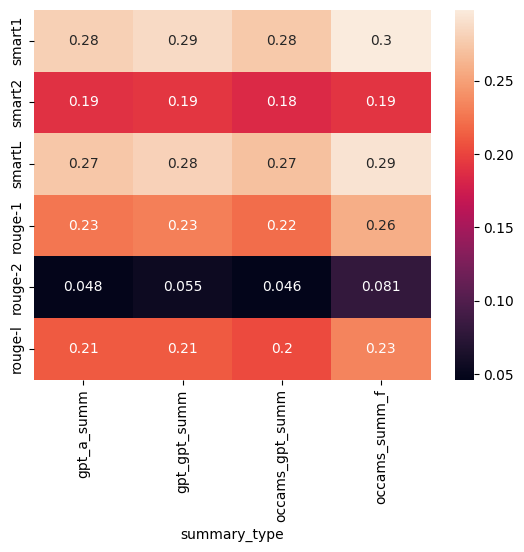

In [4]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


sns.heatmap(grouped_rs, annot=True)
plt.savefig('figures/CNN/rouge_smart_heatmap.png')
plt.show()

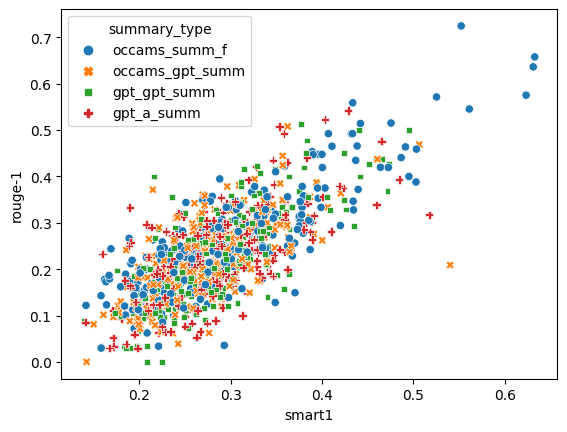

In [7]:
sns.scatterplot(x=normalized_scores['smart1'], y=normalized_scores['rouge-1'], style=normalized_scores['summary_type'], hue=normalized_scores['summary_type'])
plt.savefig('figures/CNN/rouge1_smart1_scatter.png')


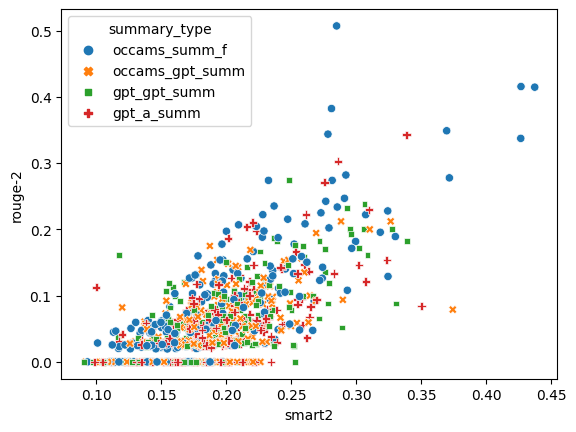

In [8]:
sns.scatterplot(x=normalized_scores['smart2'], y=normalized_scores['rouge-2'], style=normalized_scores['summary_type'], hue=normalized_scores['summary_type'])
plt.savefig('figures/CNN/rouge2_smart2_scatter.png')


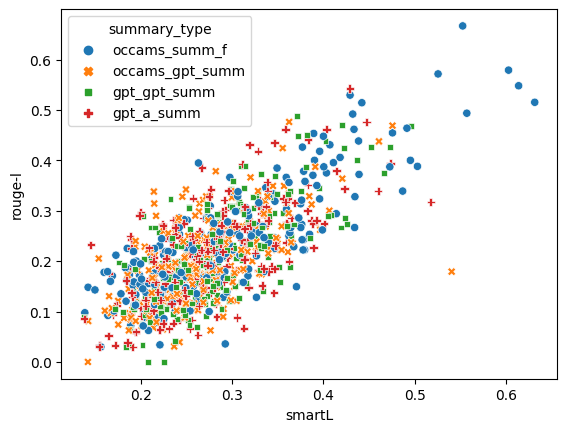

In [9]:
sns.scatterplot(x=normalized_scores['smartL'], y=normalized_scores['rouge-l'], style=normalized_scores['summary_type'], hue=normalized_scores['summary_type'])
plt.savefig('figures/CNN/rougel_smartl_scatter.png')


In [4]:
normalized_scores

,Unnamed: 0,id,smart1,smart2,smartL,summary_type,rouge-1,rouge-2,rouge-l,SummaCZS,SummaCZS_no_con,SummaConv
0,0,9880666126c7836dbe99b0b42becfee3dcab88cf,0.214893,0.151011,0.212064,occams_summ_f,0.263158,0.024390,0.210526,0.304443,0.995850,0.938289
1,1,9880666126c7836dbe99b0b42becfee3dcab88cf,0.176800,0.128107,0.175440,occams_gpt_summ,0.121212,0.028571,0.121212,-0.425466,0.338369,0.338597
2,2,9880666126c7836dbe99b0b42becfee3dcab88cf,0.216830,0.160498,0.211446,gpt_gpt_summ,0.162162,0.026316,0.162162,-0.567891,0.309224,0.283449
3,3,9880666126c7836dbe99b0b42becfee3dcab88cf,0.158877,0.113617,0.155032,gpt_a_summ,0.032258,0.000000,0.032258,-0.653831,0.020729,0.305042
4,4,c24025591e20b5d21062d1a1ec8fbf4686b963b7,0.229434,0.153067,0.215163,occams_summ_f,0.235294,0.025641,0.176471,0.052734,0.994629,0.982244
...,...,...,...,...,...,...,...,...,...,...,...,...
983,983,e1afe080ecf3565b0103214c21f49e8b03741024,0.391408,0.230557,0.339596,gpt_a_summ,0.315789,0.065574,0.280702,-0.270500,0.130928,0.221916
984,984,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.308414,0.160364,0.308414,occams_summ_f,0.281250,0.028986,0.250000,0.454590,0.994629,0.882237
985,985,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.248175,0.171783,0.248175,occams_gpt_summ,0.206897,0.063492,0.206897,-0.230296,0.347341,0.398169
986,986,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.278930,0.142684,0.278930,gpt_gpt_summ,0.150943,0.071429,0.150943,-0.862564,0.030991,0.212445


<Figure size 640x480 with 0 Axes>

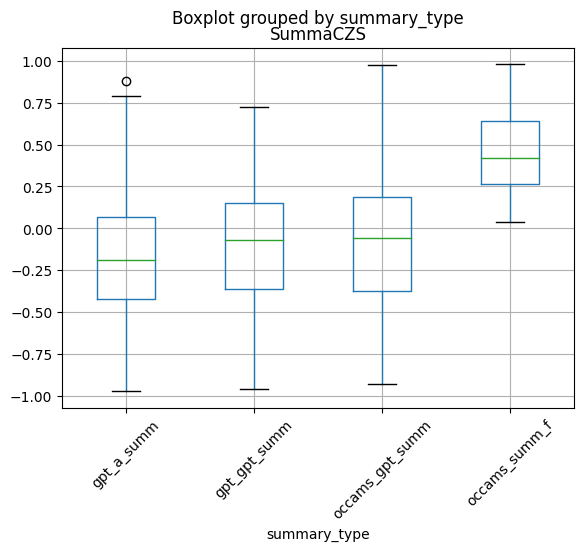

In [14]:
myfig = plt.figure()
boxplot = normalized_scores.boxplot(column=['SummaCZS'], by='summary_type', rot=45)
myfig.savefig('figures/CNN/summaCZS_boxplot.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

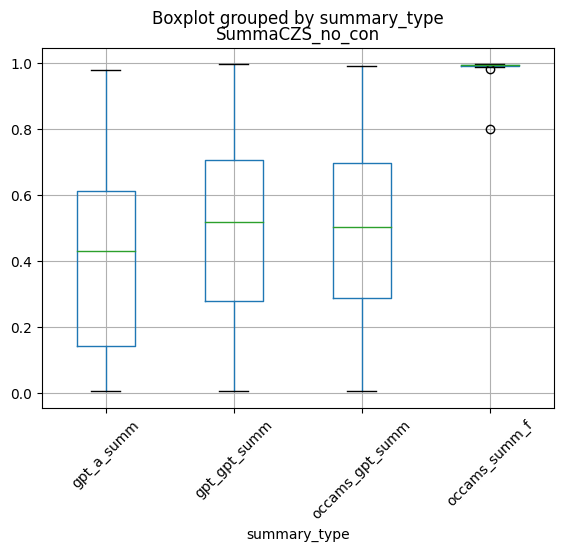

In [15]:
myfig = plt.figure()
boxplot = normalized_scores.boxplot(column=['SummaCZS_no_con'], by='summary_type', rot=45)
myfig.savefig('figures/CNN/summaCZS_nocon_boxplot.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

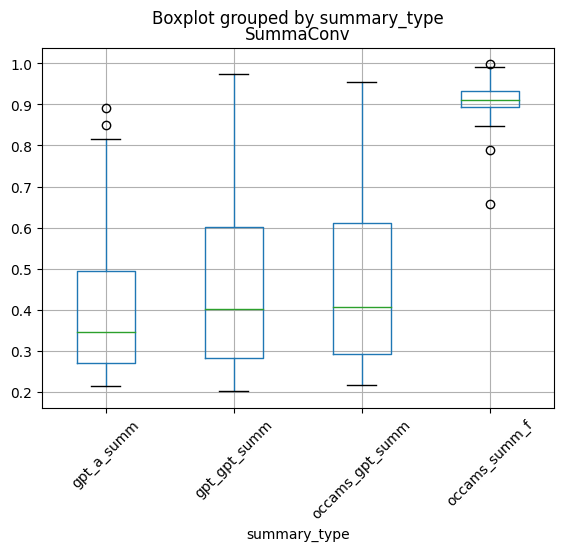

In [16]:
myfig = plt.figure()
boxplot = normalized_scores.boxplot(column=['SummaConv'], by='summary_type', rot=45)
myfig.savefig('figures/CNN/summaConv_boxplot.png', bbox_inches='tight')

# Comparing OCCAMS extractive to GPT extractive

In [20]:
summary_data

,Unnamed: 0,article,highlights,id,gpt_e_summ,occams_summ_f,occams_summ_h,occams_gpt_summ_full,gpt_gpt_summ_full,occams_gpt_summ,gpt_gpt_summ,gpt_a_summ_full,gpt_a_summ,summac_scores,rouge_scores,smart_scores,lens
0,1881,"NEW YORK (CNN) -- Nonnie Dotson, a nurse in th...",Nonnie Dotson was visiting brother in suburb o...,9880666126c7836dbe99b0b42becfee3dcab88cf,"Nonnie Dotson, a nurse in the U.S. Air Force, ...","NEW YORK (CNN) -- Nonnie Dotson, a nurse in th...","NEW YORK (CNN) -- Nonnie Dotson, a nurse in th...","Nonnie Dotson, a nurse in the U.S. Air Force, ...","Nonnie Dotson, a nurse in the U.S. Air Force, ...",Nurse Nonnie Dotson disappeared amid a child s...,Nurse Nonnie Dotson disappeared during a child...,"{\n ""timestamp"": ""2023-06-30T09:15:00"",\n ""t...",The Battle of Zentaria Strait accelerated Oper...,"[{'SummaCZS': 0.304443359375, 'SummaCZS_no_con...","[{'rouge-1': 0.26315788974030474, 'rouge-2': 0...","[{'smart1': 21.489341227507943, 'smart2': 15.1...","{'occams_summ_f': 241, 'occams_gpt_summ': 193,..."
1,1332,(CNN) -- With a week to go before Election Day...,Obama leads by 8 points in most recent CNN nat...,c24025591e20b5d21062d1a1ec8fbf4686b963b7,The most recent national CNN poll of polls sho...,"In Florida, a CNN/USA Today/Gallup poll conduc...",(CNN) -- With a week to go before Election Day...,Recent national polls show Democratic presiden...,The most recent national CNN poll of polls sho...,Recent national polls show Obama leading McCai...,The most recent national CNN poll of polls sho...,Recent national polls show Democratic presiden...,"Recent polls show Obama leading McCain, but hi...","[{'SummaCZS': 0.052734375, 'SummaCZS_no_con': ...","[{'rouge-1': 0.23529411268598627, 'rouge-2': 0...","[{'smart1': 22.943422986118755, 'smart2': 15.3...","{'occams_summ_f': 259, 'occams_gpt_summ': 248,..."
2,444,"BAGHDAD, Iraq (CNN) -- Four U.S. soldiers die...","NEW: As Iraq war enters sixth year, American d...",d80e6a3be826df05df00a87f49cc426fd597f085,Four U.S. soldiers died in a roadside bombing ...,"BAGHDAD, Iraq (CNN) -- Four U.S. soldiers died...","BAGHDAD, Iraq (CNN) -- Four U.S. soldiers died...",Four U.S. soldiers were killed in a roadside b...,Four U.S. soldiers were killed in a roadside b...,4 US soldiers and 8 Pentagon contractors were ...,"Four U.S. soldiers died, reaching 4,000 Americ...",Four U.S. soldiers were killed in a roadside b...,"4 US soldiers die in Iraq bombing, marking 4,0...","[{'SummaCZS': 0.238525390625, 'SummaCZS_no_con...","[{'rouge-1': 0.2857142808163266, 'rouge-2': 0....","[{'smart1': 24.268662715303456, 'smart2': 15.6...","{'occams_summ_f': 256, 'occams_gpt_summ': 230,..."
3,86,"ALGIERS, Algeria (CNN) -- Rescuers are sifting...",Two bombs explode in Algerian capital near gov...,4cf51ce9372dff8ff7f44f098eab1c1d7569af7a,Rescuers are sifting through the rubble of the...,"ALGIERS, Algeria (CNN) -- Rescuers are sifting...","ALGIERS, Algeria (CNN) -- Rescuers are sifting...",A powerful bomb destroyed the United Nations h...,A bomb attack has caused significant damage to...,A powerful bomb by al Qaeda destroyed the UN h...,"Bomb attack on UN headquarters in Algiers, kil...",A powerful bomb ripped off the facade of the U...,Al Qaeda-linked group destroys U.N. HQ in Algi...,"[{'SummaCZS': 0.42010498046875, 'SummaCZS_no_c...","[{'rouge-1': 0.17283950117969835, 'rouge-2': 0...","[{'smart1': 19.861885634892886, 'smart2': 13.5...","{'occams_summ_f': 266, 'occams_gpt_summ': 195,..."
4,958,(CNN) -- The crib in Ellen Darcy's Boston home...,"Guatemala and Vietnam say corruption, baby-ste...",7551503e7e57bd519913b0df90ca1e80d5305b05,Guatemala has announced it will conduct a case...,(CNN) -- The crib in Ellen Darcy's Boston home...,(CNN) -- The crib in Ellen Darcy's Boston home...,Guatemala is conducting a review of all pendin...,Guatemala is conducting a review of all pendin...,"Guatemala reviews pending foreign adoptions, m...",Guatemala is conducting a review of all pendin...,The countries of Guatemal

In [31]:
summary_cols = ['gpt_e_summ', 'gpt_gpt_summ', 'occams_summ_h', 'occams_gpt_summ']

def rouge_score(row):
    all_rouge_scores = []
    for col in summary_cols:
        scores = rouge.get_scores(row[summary_col], row[col])[0]
        for score in scores.keys():
            scores[score] = scores[score]['f']
        scores['summary_type'] = col
        all_rouge_scores.append(scores)
    return all_rouge_scores

In [34]:
summary_data['rouge_scores'] = summary_data.apply(rouge_score, axis=1)
rouge_score_df = summary_data[[id_col, 'rouge_scores']].explode('rouge_scores')
rouge_score_df = pd.concat([rouge_score_df.drop(['rouge_scores'], axis=1), rouge_score_df['rouge_scores'].apply(pd.Series)], axis=1)
rouge_score_df

,id,rouge-1,rouge-2,rouge-l,summary_type
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.240000,0.017094,0.200000,gpt_e_summ
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.162162,0.026316,0.162162,gpt_gpt_summ
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.191176,0.037736,0.161765,occams_summ_h
1881,9880666126c7836dbe99b0b42becfee3dcab88cf,0.121212,0.028571,0.121212,occams_gpt_summ
1332,c24025591e20b5d21062d1a1ec8fbf4686b963b7,0.347826,0.131579,0.295652,gpt_e_summ
...,...,...,...,...,...
420,e1afe080ecf3565b0103214c21f49e8b03741024,0.437500,0.200000,0.437500,occams_gpt_summ
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.220183,0.059701,0.201835,gpt_e_summ
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.150943,0.071429,0.150943,gpt_gpt_summ
1708,72d11f6df74ab4431ce24b8cb391d239e998ec3e,0.222222,0.045455,0.203704,occams_summ_h


In [35]:
rouge_score_df.groupby(by=['summary_type'])[['rouge-1', 'rouge-2', 'rouge-l']].mean().T

summary_type,gpt_e_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_h
rouge-1,0.275462,0.230669,0.220528,0.250601
rouge-2,0.096459,0.054769,0.046320,0.078568
rouge-l,0.256560,0.211036,0.203352,0.235465


In [36]:
matcher = mf.chrf_matcher
smart_scorer = scorer.SmartScorer(matching_fn=matcher)

from collections import OrderedDict
 

def smart_score(row):
    all_smart_scores = []
    for col in summary_cols:
        scores = smart_scorer.smart_score(row[summary_col], row[col])
        for score in scores.keys():
            scores[score] = scores[score]['fmeasure']
        scores['summary_type'] = col
        all_smart_scores.append(scores)
    return all_smart_scores

summary_data['smart_scores'] = summary_data.apply(smart_score, axis=1)

In [37]:
smart_score_df = summary_data[[id_col, 'smart_scores']].explode('smart_scores')
smart_score_df = pd.concat([smart_score_df.drop(['smart_scores'], axis=1), smart_score_df['smart_scores'].apply(pd.Series)], axis=1)

smart_score_df.groupby(by=['summary_type'])[['smart1', 'smart2', 'smartL']].mean().T

summary_type,gpt_e_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_h
smart1,33.830673,28.733920,27.503279,30.844467
smart2,24.538248,19.223180,18.492366,23.016349
smartL,32.584715,28.116414,27.009379,29.588867


In [38]:
from summac.model_summac import SummaCZS, SummaCConv

model_zs = SummaCZS(granularity="sentence", model_name="vitc", device="cuda", max_doc_sents=500) # If you have a GPU: switch to: device="cuda"
model_zs_nocon = SummaCZS(granularity="sentence", model_name="vitc", device="cuda", max_doc_sents=500, use_con=False) # If you have a GPU: switch to: device="cuda"

model_conv = SummaCConv(models=["vitc"], bins='percentile', granularity="sentence", nli_labels="e", device="cuda", start_file="default", agg="mean", max_doc_sents=500)

<All keys matched successfully>


In [39]:
def summac_score(row):
    all_summac_scores = []
    with open('untitled.txt', 'a') as f:
        f.write('hi')
    for col in summary_cols:
        scores = {}
        scores['SummaCZS'] = model_zs.score([row[document_col]], [row[col]])['scores'][0]
        scores['SummaCZS_no_con'] =model_zs_nocon.score([row[document_col]], [row[col]])['scores'][0]
        scores['SummaConv'] = model_conv.score([row[document_col]], [row[col]])['scores'][0]
        scores['summary_type'] = col
        all_summac_scores.append(scores)
    return all_summac_scores

summary_data['summac_scores'] = summary_data.apply(summac_score, axis=1)

In [40]:
summac_score_df = summary_data[[id_col, 'summac_scores']].explode('summac_scores')
summac_score_df = pd.concat([summac_score_df.drop(['summac_scores'], axis=1), summac_score_df['summac_scores'].apply(pd.Series)], axis=1)
summac_score_df

summac_score_df.groupby(by=['summary_type'])[['SummaCZS', 'SummaCZS_no_con', 'SummaConv']].mean().T

summary_type,gpt_e_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_h
SummaCZS,0.426969,-0.102510,-0.086492,0.430628
SummaCZS_no_con,0.973654,0.504205,0.490599,0.993656
SummaConv,0.890439,0.450414,0.455483,0.916241


In [43]:
all_scores = [smart_score_df, rouge_score_df, summac_score_df]
complete_score_df = reduce(lambda x, y: pd.merge(x, y, on=['id', 'summary_type']), all_scores)
complete_score_df

,id,smart1,smart2,smartL,summary_type,rouge-1,rouge-2,rouge-l,SummaCZS,SummaCZS_no_con,SummaConv
0,9880666126c7836dbe99b0b42becfee3dcab88cf,23.138255,17.309568,22.740092,gpt_e_summ,0.240000,0.017094,0.200000,0.240771,0.993848,0.934236
1,9880666126c7836dbe99b0b42becfee3dcab88cf,21.683000,16.049833,21.144599,gpt_gpt_summ,0.162162,0.026316,0.162162,-0.567891,0.309224,0.283449
2,9880666126c7836dbe99b0b42becfee3dcab88cf,22.906728,18.084667,21.702235,occams_summ_h,0.191176,0.037736,0.161765,0.291748,0.995667,0.940378
3,9880666126c7836dbe99b0b42becfee3dcab88cf,17.680038,12.810701,17.544049,occams_gpt_summ,0.121212,0.028571,0.121212,-0.425466,0.338369,0.338597
4,c24025591e20b5d21062d1a1ec8fbf4686b963b7,38.298006,27.526557,34.104218,gpt_e_summ,0.347826,0.131579,0.295652,0.302165,0.992594,0.922841
...,...,...,...,...,...,...,...,...,...,...,...
983,e1afe080ecf3565b0103214c21f49e8b03741024,46.079319,31.047219,46.079319,occams_gpt_summ,0.437500,0.200000,0.437500,0.271159,0.710286,0.409427
984,72d11f6df74ab4431ce24b8cb391d239e998ec3e,31.321517,21.698849,27.297086,gpt_e_summ,0.220183,0.059701,0.201835,0.605804,0.995361,0.918167
985,72d11f6df74ab4431ce24b8cb391d239e998ec3e,27.893044,14.268375,27.893044,gpt_gpt_summ,0.150943,0.071429,0.150943,-0.862564,0.030991,0.212445
986,72d11f6df74ab4431ce24b8cb391d239e998ec3e,32.154121,23.276845,31.744875,occams_summ_h,0.222222,0.045455,0.203704,0.654251,0.995483,0.920418


In [45]:
score_cols = list(set(complete_score_df.columns) - set(['id', 'summary_type']))
score_cols.sort()

normalized_scores = complete_score_df.copy()
normalized_scores['smart1'] = normalized_scores['smart1'].div(100)
normalized_scores['smart2'] = normalized_scores['smart2'].div(100)
normalized_scores['smartL'] = normalized_scores['smartL'].div(100)
normalized_scores.groupby(by=['summary_type'])[score_cols].mean().T

summary_type,gpt_e_summ,gpt_gpt_summ,occams_gpt_summ,occams_summ_h
SummaCZS,0.426969,-0.102510,-0.086492,0.430628
SummaCZS_no_con,0.973654,0.504205,0.490599,0.993656
SummaConv,0.890439,0.450414,0.455483,0.916241
rouge-1,0.275462,0.230669,0.220528,0.250601
rouge-2,0.096459,0.054769,0.046320,0.078568
rouge-l,0.256560,0.211036,0.203352,0.235465
smart1,0.338307,0.287339,0.275033,0.308445
smart2,0.245382,0.192232,0.184924,0.230163
smartL,0.325847,0.281164,0.270094,0.295889


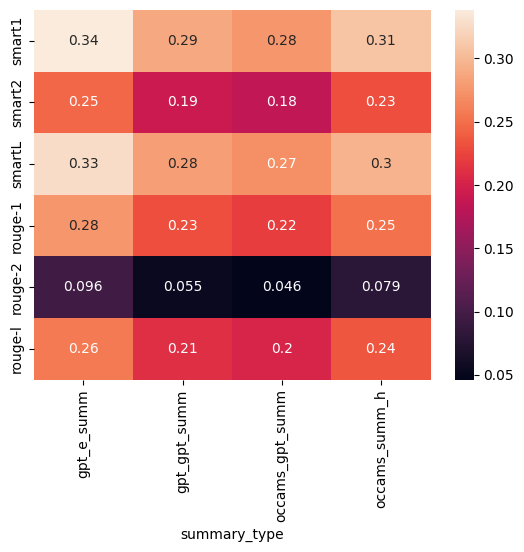

In [46]:
grouped_rs = normalized_scores.groupby(by=['summary_type'])[['smart1', 'smart2', 'smartL', 'rouge-1', 'rouge-2', 'rouge-l']].mean().T

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


sns.heatmap(grouped_rs, annot=True)
plt.savefig('figures/CNN/rouge_smart_heatmap.png')
plt.show()

<Figure size 640x480 with 0 Axes>

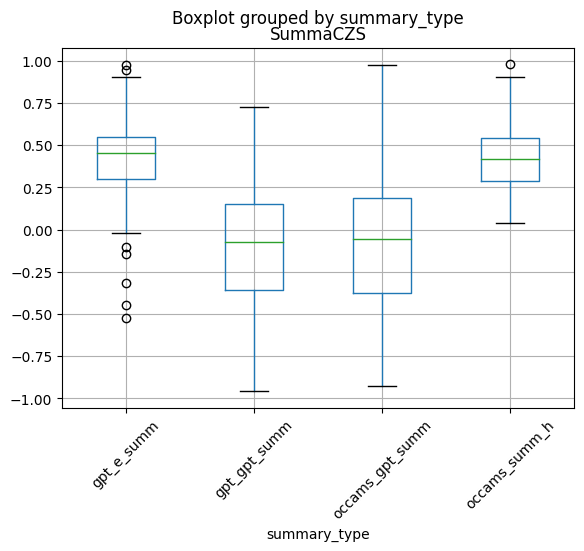

In [47]:
myfig = plt.figure()
boxplot = normalized_scores.boxplot(column=['SummaCZS'], by='summary_type', rot=45)


<Figure size 640x480 with 0 Axes>

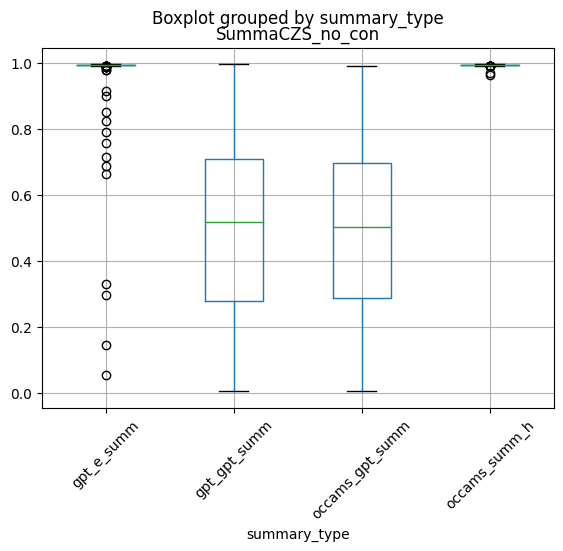

In [48]:
myfig = plt.figure()
boxplot = normalized_scores.boxplot(column=['SummaCZS_no_con'], by='summary_type', rot=45)

<Figure size 640x480 with 0 Axes>

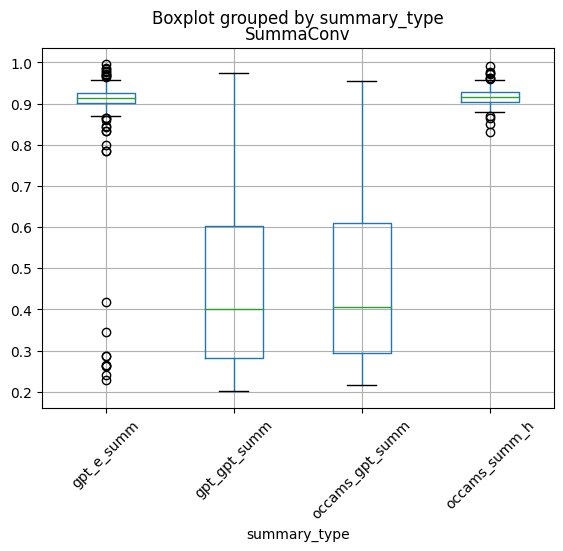

In [49]:
myfig = plt.figure()
boxplot = normalized_scores.boxplot(column=['SummaConv'], by='summary_type', rot=45)